# Importing Libraries 

In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset

In [278]:
df=pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [279]:


df.shape

(545, 13)

Our Dataset has 545 rows and 13 columns

In [280]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [282]:

df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [283]:

from sklearn.preprocessing import LabelEncoder
features = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]
le = LabelEncoder()
df[features] = df[features].apply(le.fit_transform)

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int32
 6   guestroom         545 non-null    int32
 7   basement          545 non-null    int32
 8   hotwaterheating   545 non-null    int32
 9   airconditioning   545 non-null    int32
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int32
 12  furnishingstatus  545 non-null    int32
dtypes: int32(7), int64(6)
memory usage: 40.6 KB


# Splitting Dataset

In [285]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

In [286]:
#Data Scaling

df_new = df.copy(deep=True)
num_columns = ['area', 'bedrooms', 'bathrooms', 'stories','parking']

df_new[num_columns] = MinMaxScaler().fit_transform(df_new[num_columns])

df_new.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,0
1,12250000,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,0
2,12250000,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,1
3,12215000,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,0
4,11410000,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,0


In [287]:
X = df.drop(['price'],axis=1)
y = df['price']

In [288]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)
len(X_train),len(X_test)

(408, 137)

# Model

In [289]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [290]:


y_predict = model.predict(X_test)

In [291]:
y_predict

array([ 2668938.73495442,  3690810.69493339,  5977872.22367347,
        3814982.64635074,  6538076.98309014,  6988100.19135976,
        3599536.32752979,  3085176.90285307,  5392813.52429735,
        3152812.19437679,  5054245.79702529,  2176417.5630864 ,
        4247017.53880727,  4549158.59538645,  6731430.53327605,
        2684056.01595156,  7333171.31948787,  6392007.71738388,
        5145016.09387835,  4289111.1498496 ,  2615782.6297394 ,
        2001178.88227607,  5864925.72010586,  5393575.53893266,
        6796545.70508061,  6149269.87468053,  3644104.07336219,
        3723770.59001238,  3638788.30568611,  3785984.18407989,
        4498774.19907095,  5070653.2615061 ,  5515115.53243013,
        5539532.72690297,  7523309.51911127,  5147785.8800396 ,
        6712620.99881564,  2391089.19593329,  5359370.60183481,
        5487911.15481679,  5000461.71274707,  5266924.42886602,
        2928230.95029199,  6489190.92933049,  5837762.68933869,
        7871819.60384294,  8280158.10717

# Evaluation

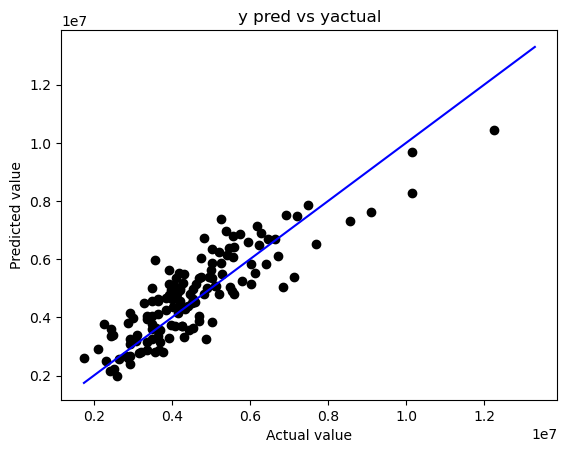

In [292]:
plt.scatter(y_test,y_predict, c='black')
x=y
plt.plot(x,y,c='b')   

plt.xlabel('Actual value')                         
plt.ylabel('Predicted value') 
plt.title('y pred vs yactual')
plt.show()

In [295]:
from sklearn.metrics import r2_score,explained_variance_score
accuracy=r2_score(y_predict,y_test)
variance=explained_variance_score(y_predict,y_test)



In [297]:
accuracy

0.6862161513674347

In [298]:
variance

0.7027394010802103